<a href="https://colab.research.google.com/github/alfialawiyah03/PCVK_Genap_2021/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Alfi Alawiyah

NIM : 2341729015

1. Import the existing folder on your Drive as follows.

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import the following libraries that will be used during the following week 6 practicum
trial.

In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :
(Use image lena.jpg)

<BarContainer object of 256 artists>

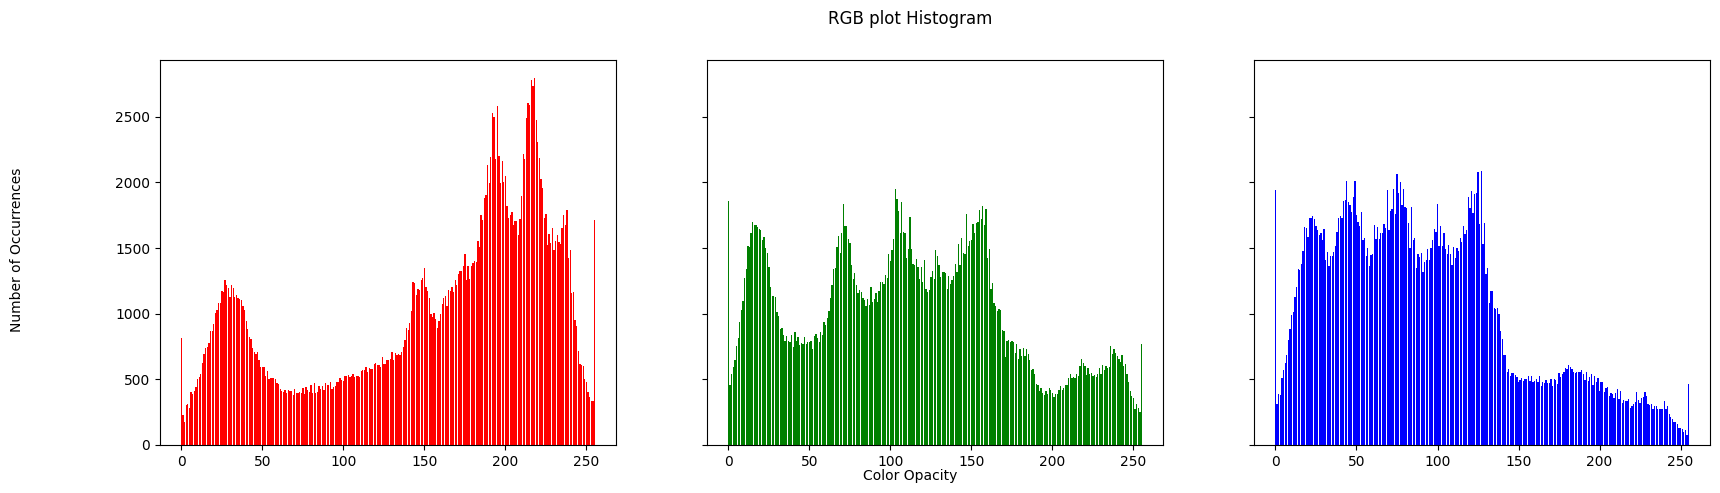

In [14]:
img = cv.imread('/content/drive/MyDrive/images/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('RGB plot Histogram')
fig.text(0.05, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Color Opacity', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


4. After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

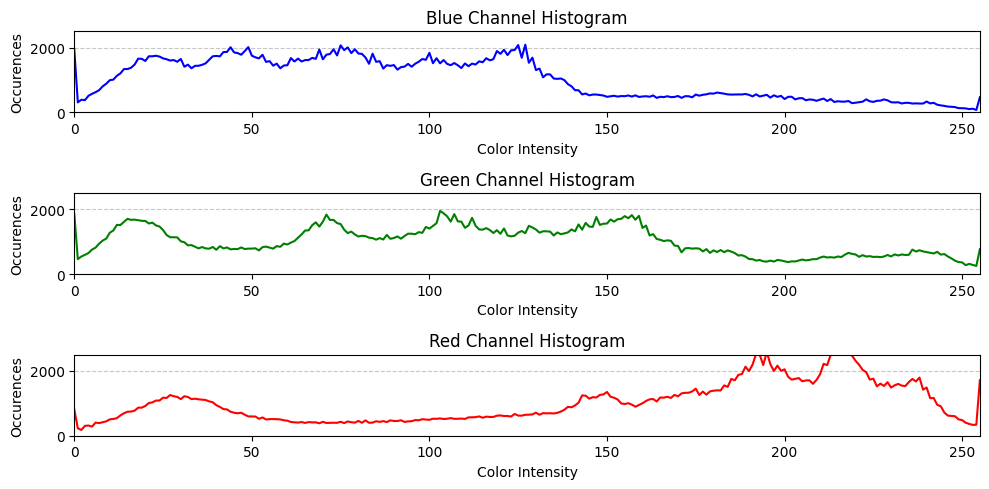

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/images/lena.jpg')

if image is None:
    print("Error: Image not found")
    exit()

# Step 2: Split the image into its color channels (B, G, R)
blue_channel, green_channel, red_channel = cv2.split(image)

# Step 3: Create histograms for each color channel using NumPy
hist_blue, _ = np.histogram(blue_channel.ravel(), bins=256, range=(0, 256))
hist_green, _ = np.histogram(green_channel.ravel(), bins=256, range=(0, 256))
hist_red, _ = np.histogram(red_channel.ravel(), bins=256, range=(0, 256))

# Step 4: Plot the histograms
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.plot(hist_blue, color='blue')
plt.title('Blue Channel Histogram')
plt.xlim(0, 255)
plt.ylim(0, 2500)  # Set the y-axis limit to 2500
plt.xlabel('Color Intensity')
plt.ylabel('Occurences')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 1, 2)
plt.plot(hist_green, color='green')
plt.title('Green Channel Histogram')
plt.xlim(0, 255)
plt.ylim(0, 2500)  # Set the y-axis limit to 2500
plt.xlabel('Color Intensity')
plt.ylabel('Occurences')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 1, 3)
plt.plot(hist_red, color='red')
plt.title('Red Channel Histogram')
plt.xlim(0, 255)
plt.ylim(0, 2500)  # Set the y-axis limit to 2500
plt.xlabel('Color Intensity')
plt.ylabel('Occurences')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

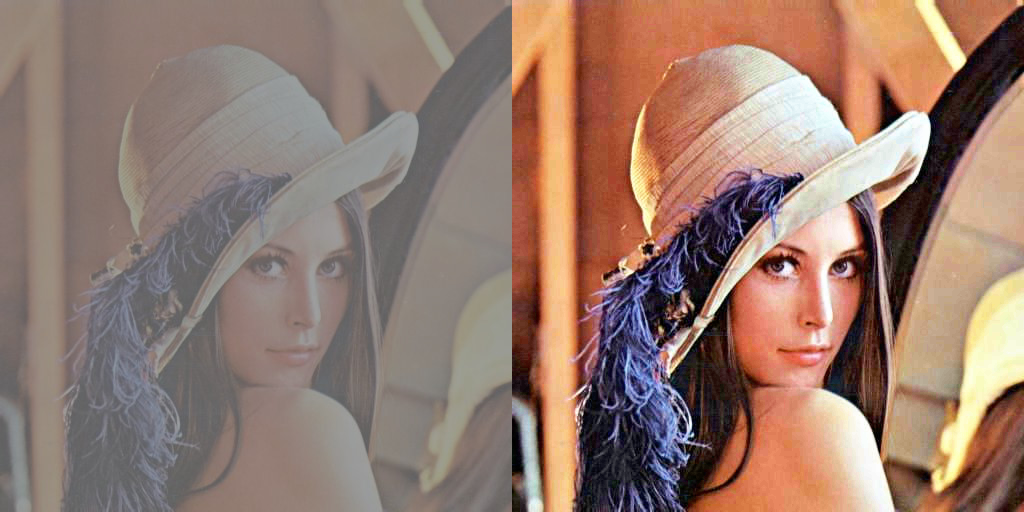

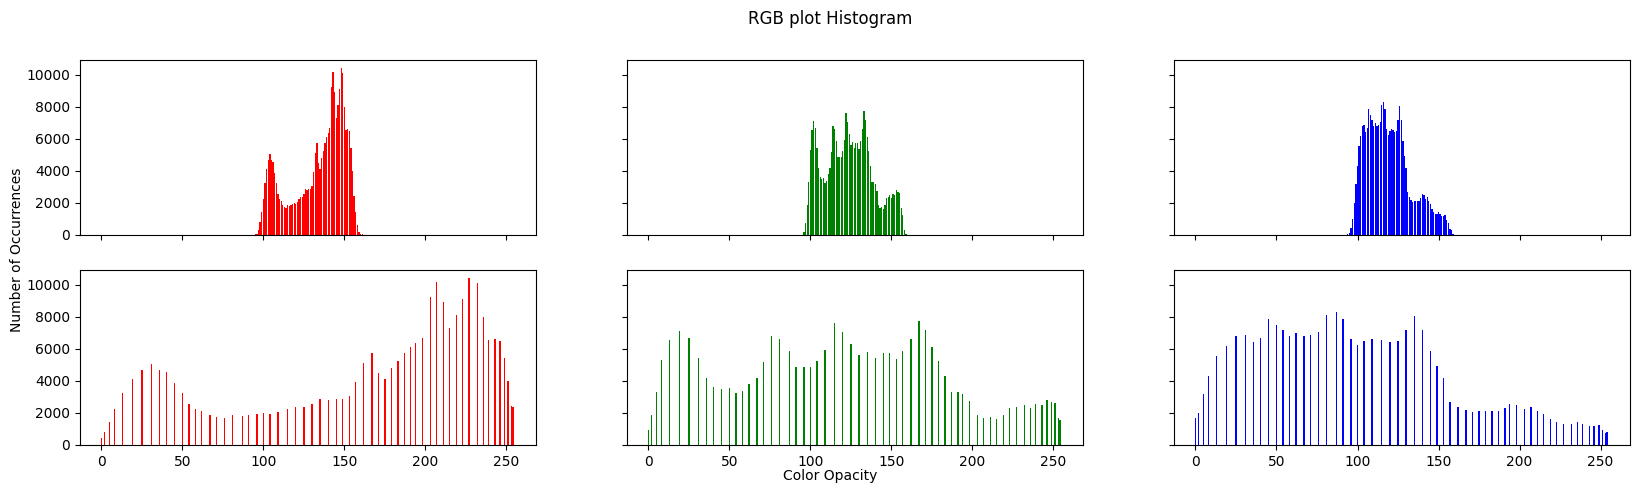

In [20]:
img = cv.imread('/content/drive/MyDrive/images/lena_lc.jpg')
def histog(img):
  height,width,depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

#convert to Numpy array
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#STEP 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('RGB plot Histogram')
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Opacity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('RGB plot Histogram')
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Color Opacity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?

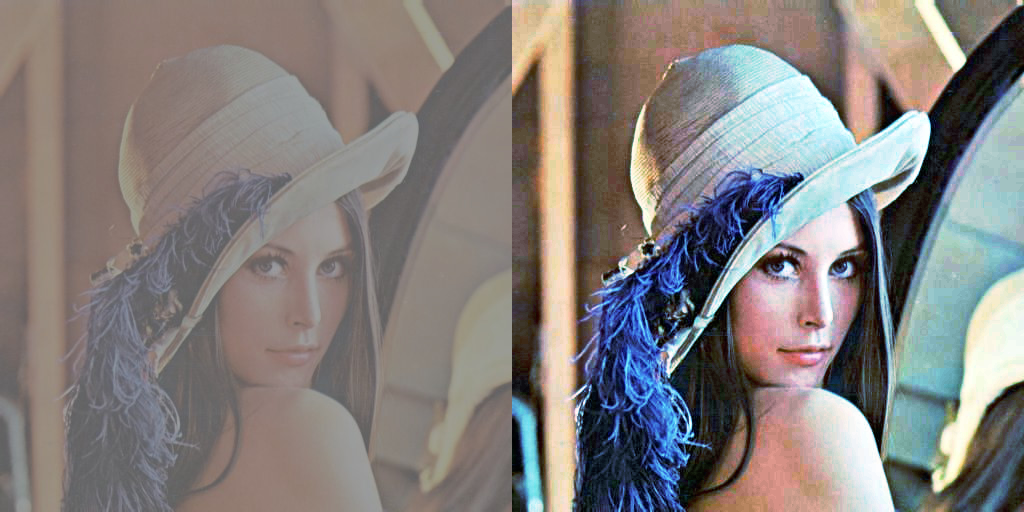

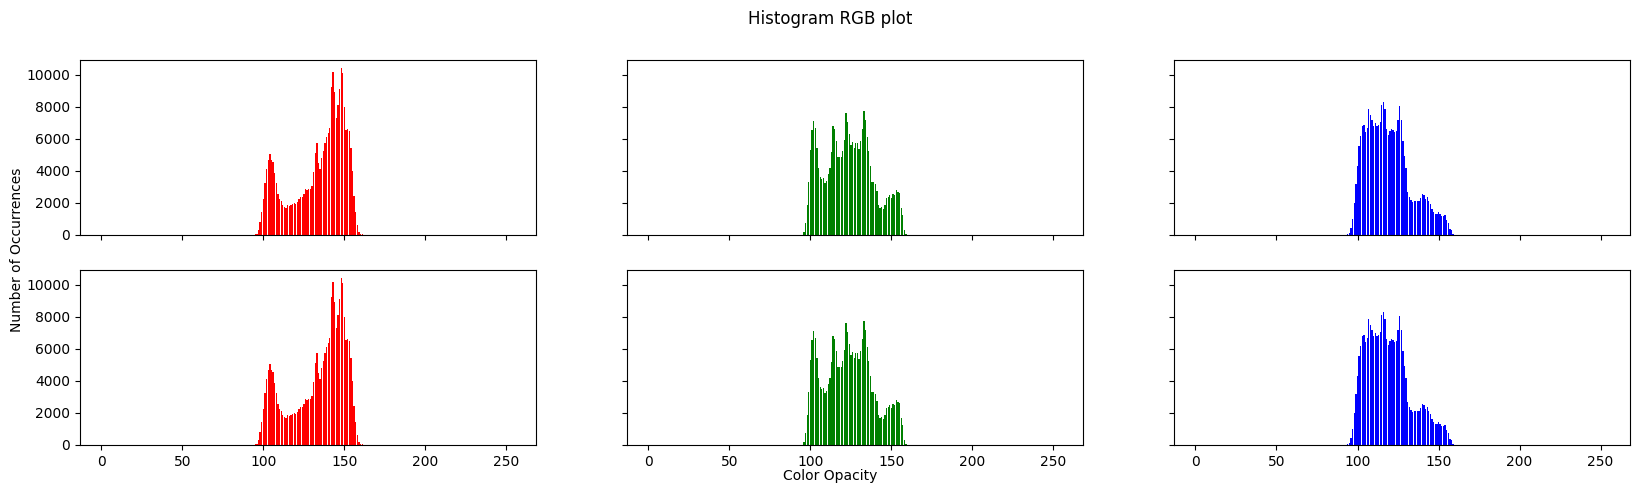

In [21]:
# Histogram equalization using library
img = cv.imread('/content/drive/MyDrive/images/lena_lc.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Opacity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('RGB plot Histogram')
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Opacity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)

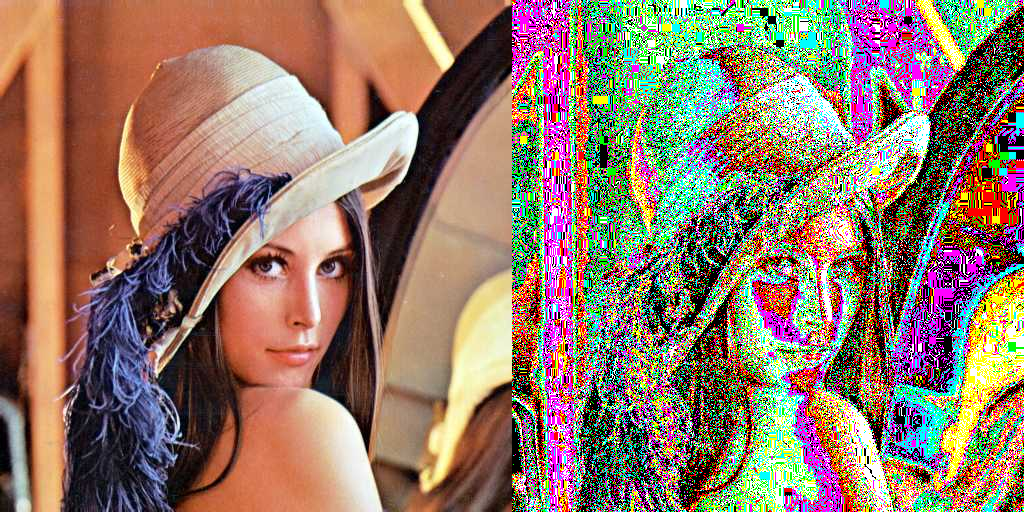

In [24]:
img = cv.imread('/content/drive/MyDrive/images/testlena.jpg')

# Define the 8 colors you want to map to
colors = np.array([
    [0, 0, 0],       # Black
    [0, 255, 0],     # Green
    [255, 255, 0],   # Yellow
    [0, 0, 255],     # Blue
    [0, 255, 255],   # Cyan
    [255, 0, 255],   # Magenta
    [255, 255, 255]  # White
], dtype=np.uint8)

# Convert the image to a 1D array of RGB values
pixels = np.reshape(image, (-1, 3))

# Calculate the Euclidean distance between each pixel and the 8 colors
distances = np.sqrt(np.sum((pixels[:, np.newaxis] - colors) ** 2, axis=2))

# Find the index of the closest color for each pixel
closest_color_indices = np.argmin(distances, axis=1)

# Map the original pixel values to the closest colors
quantized_image = colors[closest_color_indices].reshape(image.shape)

# Display the original and quantized images
final_frame = cv.hconcat((image, quantized_image))
cv2_imshow(final_frame)

8. Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)

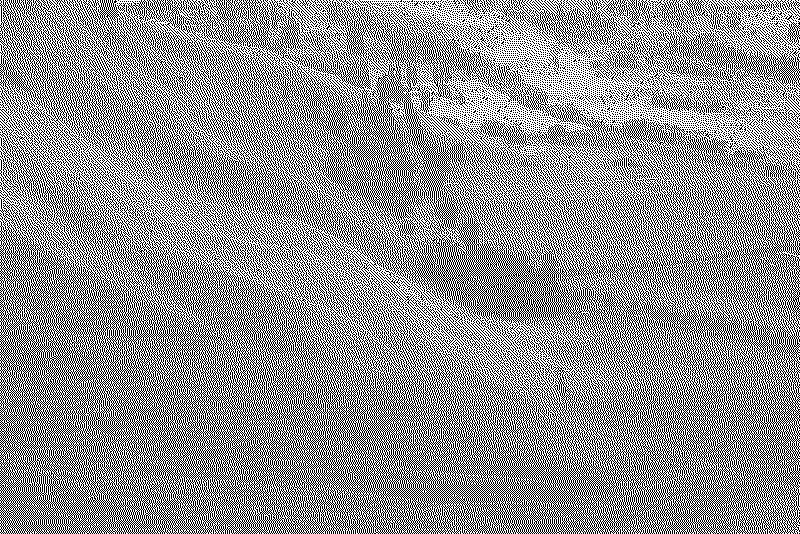

In [28]:
# Load the input image
image = cv.imread('/content/drive/MyDrive/images/wiki.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get the height and width of the image
height, width = gray_image.shape
# Define the Floyd-Steinberg dithering matrix
dither_matrix = np.array([
    [0, 0, 7],
    [3, 5, 1]
], dtype=np.float32) / 16.0

# Loop through each pixel of the image
for y in range(height):
    for x in range(width):
        # Get the old pixel value (gray intensity)
        old_pixel = gray_image[y, x]

        # Quantize the pixel value based on the Floyd-Steinberg algorithm
        new_pixel = round(old_pixel / 255) * 255

        # Update the pixel value in the image
        gray_image[y, x] = new_pixel

        # Calculate the quantization error
        quant_error = old_pixel - new_pixel

        # Diffusion of the quantization error to neighboring pixels
        for dx in range(-1, 2):
            for dy in range(2):
                if 0 <= x + dx < width and 0 <= y + dy < height:
                    gray_image[y + dy, x + dx] += quant_error * dither_matrix[dy, dx + 1]

# Display the dithered image
cv2_imshow(gray_image)

